# Instalacion de librerias
#### En primer lugar, nos aseguramos de tener instaladas las librerías necesarias (pandas, numpy, matplotlib, seaborn, scikit-learn). En caso de necesitar alguna, la podemos instalar ejecutando el siguiente bloque de codigo. Sino es necesario, se puede saltar y pasar al siguiente bloque.

In [38]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install scikit-learn

# Carga de librerias y del dataset
#### Importamos las librerias necesarias, cargamos el dataset y mostramos las primeras lineas del dataset para verificar si la carga fue correcta. En caso de haber un problema, aparecerá un mensaje diciendo que se debe verificar la ruta y el nombre del archivo (si descarga el proyecto, sera necesario ajustar la variable "file_path".

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA

#  Cargar el dataset 
file_path = 'C:/Users/poopy/Documents/00 - Tecnicatura Ciencia de Datos e Inteligencia Artificial/2025/Aprendizaje_Automatico/Trabajo Final/enfermedades_ecv/data/'
dir_raw = 'raw/'
dir_proc = 'processed/'
file_name = 'cardiovascular_disease_dataset.csv'
try:
    df = pd.read_csv(file_path+dir_raw+file_name)
    print(f"Dataset '{file_name}' cargado exitosamente.")
    # Mostrar las primeras 5 filas del DataFrame
    print("\nPrimeras 5 filas del DataFrame:")
    print(df.head())
except FileNotFoundError:
    print(f"Error: El archivo '{file_name}' no se encontró. Asegúrate de que el nombre y la ruta sean correctos.")

Dataset 'cardiovascular_disease_dataset.csv' cargado exitosamente.

Primeras 5 filas del DataFrame:
   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofma

# Exploración Inicial de los Datos
#### Ahora describimos los datos y mostramos sus características principales, para asi entender la estructura y el contenido del dataset.

In [6]:
# Mostrar el número de filas y columnas (dimensiones del dataset)
print(f"\nDimensiones del DataFrame: {df.shape[0]} filas, {df.shape[1]} columnas")


Dimensiones del DataFrame: 1000 filas, 14 columnas


In [7]:
# Mostrar información general del DataFrame (tipos de datos, valores no nulos, uso de memoria)
print("\nInformación detallada del DataFrame:")
df.info()


Información detallada del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


#### Podemos ver que el dataset cuenta con 1000 filas (registros de pacientes) y 14 columnas (características), que los tipos de datos de cada columna son int64 y float64 y que no hay valores nulos . 

In [8]:
# Descripción estadística de las columnas numéricas
print("\nDescripción estadística de las columnas numéricas:")
print(df.describe())


Descripción estadística de las columnas numéricas:
          patientid         age       gender    chestpain    restingBP  \
count  1.000000e+03  1000.00000  1000.000000  1000.000000  1000.000000   
mean   5.048704e+06    49.24200     0.765000     0.980000   151.747000   
std    2.895905e+06    17.86473     0.424211     0.953157    29.965228   
min    1.033680e+05    20.00000     0.000000     0.000000    94.000000   
25%    2.536440e+06    34.00000     1.000000     0.000000   129.000000   
50%    4.952508e+06    49.00000     1.000000     1.000000   147.000000   
75%    7.681877e+06    64.25000     1.000000     2.000000   181.000000   
max    9.990855e+06    80.00000     1.000000     3.000000   200.000000   

       serumcholestrol  fastingbloodsugar  restingrelectro  maxheartrate  \
count      1000.000000        1000.000000      1000.000000   1000.000000   
mean        311.447000           0.296000         0.748000    145.477000   
std         132.443801           0.456719         0.7

#### Tambien podemos ver un resumen estadístico de las columnas numéricas (conteo, media, desviación estándar, mínimos, máximos, cuartiles), útil para detectar anomalías o rangos inusuales, que a simple vista no se observa ninguna. 


In [9]:
# Contar valores únicos por columna para identificar columnas categóricas y su cardinalidad
print("\nConteo de valores únicos por columna:")
for column in df.columns:
    unique_count = df[column].nunique()
    print(f"- '{column}': {unique_count} valores únicos")
    if unique_count < 20 and df[column].dtype == 'object' or df[column].dtype == 'int64' and unique_count < 10:
        print(f"  Valores únicos: {sorted(df[column].unique())}")


Conteo de valores únicos por columna:
- 'patientid': 1000 valores únicos
- 'age': 61 valores únicos
- 'gender': 2 valores únicos
  Valores únicos: [0, 1]
- 'chestpain': 4 valores únicos
  Valores únicos: [0, 1, 2, 3]
- 'restingBP': 95 valores únicos
- 'serumcholestrol': 344 valores únicos
- 'fastingbloodsugar': 2 valores únicos
  Valores únicos: [0, 1]
- 'restingrelectro': 3 valores únicos
  Valores únicos: [0, 1, 2]
- 'maxheartrate': 129 valores únicos
- 'exerciseangia': 2 valores únicos
  Valores únicos: [0, 1]
- 'oldpeak': 63 valores únicos
- 'slope': 4 valores únicos
  Valores únicos: [0, 1, 2, 3]
- 'noofmajorvessels': 4 valores únicos
  Valores únicos: [0, 1, 2, 3]
- 'target': 2 valores únicos
  Valores únicos: [0, 1]


#### Como ultimo paso, se intenta identificar de manera automatica columnas categóricas y ver sus posibles valores. En este caso se puede observar que hay varias columnas categóricas y que las mismas ya se encuentran convertidas a valores numericos.

# Limpieza de datos

#### Procedemos a realizar la limpieza de los datos en caso de ser necesario, verificando valores faltantes, duplicados, outliers y, si se identifican, posibles inconsistencias en columnas categóricas.

* ## Valores faltantes

In [13]:
#  Valores faltantes (NaN) 
print("\nValores faltantes por columna antes de la limpieza:")
missing_values = df.isnull().sum()
print(missing_values)


Valores faltantes por columna antes de la limpieza:
patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64


#### Se puede ver no hay valores faltantes. En caso de haber valores faltantes, se evaluaria si se eliminan las filas afectadas (por cantidad baja o por ser datos de poca relevancia) o se procede a completar los mismos (por cantidad alta de datos faltantes o porque los datos a eliminar son importantes), pero al no haber valore faltantes, no se realizara ninguna acciona al respecto.

* ## Filas duplicadas

In [16]:
#  Filas duplicadas 
print("\nNúmero de filas duplicadas antes de la limpieza:")
duplicated_rows = df.duplicated().sum()
print(duplicated_rows)

if duplicated_rows > 0:
    df.drop_duplicates(inplace=True)
    print(f"Filas duplicadas eliminadas: {duplicated_rows}")
    print(f"Dimensiones del DataFrame después de eliminar duplicados: {df.shape}")
else:
    print("No se encontraron filas duplicadas.")


Número de filas duplicadas antes de la limpieza:
0
No se encontraron filas duplicadas.


#### Se puede ver que el dataset no tiene registros duplicados. En caso de haberlos tenido, se habrian eliminado automaticamente y se podria ver la cantidad en pantalla.

* ## Eliminacion de columnas innecesarias

In [19]:
# Asumimos que patientid no es una característica para el modelo.
df.drop('patientid', axis=1, inplace=True)
print("\nColumna 'patientid' eliminada.")


Columna 'patientid' eliminada.


#### Esta columna es un identificador y no debe usarse como característica para el modelo, por lo que la eliminamos.

* ## Codificacion de variables categoricas
#### Como ya pudimos observar en la exploracion inicial de datos, todas la s variables categoricas ya estan codificadas:
Conteo de valores únicos por columna:
- 'gender': 2 valores únicos [0, 1]
- 'chestpain': 4 valores únicos [0, 1, 2, 3]
- 'fastingbloodsugar': 2 valores únicos [0, 1]
- 'restingrelectro': 3 valores únicos [0, 1, 2]
- 'exerciseangia': 2 valores únicos [0, 1]
- 'slope': 4 valores únicos [0, 1, 2, 3]
- 'noofmajorvessels': 4 valores únicos [0, 1, 2, 3]
- 'target': 2 valores únicos [0, 1]
#### por lo que no es necesario codificarlas.

* ## Verificacion de que la variable "target" este balanceada


 Conteo de registros por clase en la columna 'target' después de la limpieza 
target
1    580
0    420
Name: count, dtype: int64

 -> La clase objetivo está balanceada.



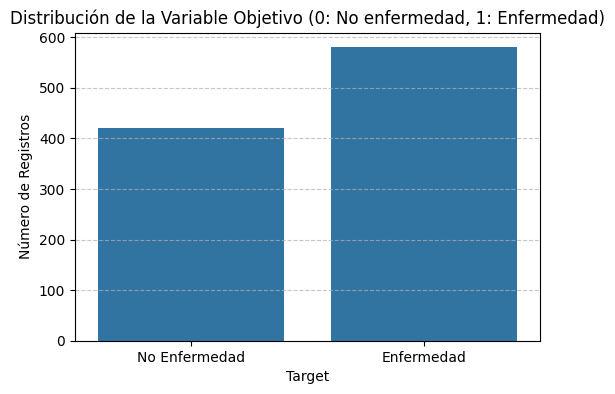

In [23]:
#  Conteo de registros por clase en la columna 'target' 
print("\n Conteo de registros por clase en la columna 'target' después de la limpieza ")
target_counts = df['target'].value_counts()
print(target_counts)

# Verificacion que el valor mas bajo capte al menos un 20% de los registros para que no afecte a los modelos.
if target_counts.min() / target_counts.sum() < 0.2:
    print("\nAdvertencia: La clase objetivo está desbalanceada. Esto podría afectar el rendimiento del modelo.")
    print("Se deberia considerar técnicas como SMOTE, sobremuestreo o submuestreo durante el entrenamiento.")
else: print("\n -> La clase objetivo está balanceada.\n")

# Visualizacion de la distribución de la variable objetivo.
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribución de la Variable Objetivo (0: No enfermedad, 1: Enfermedad)')
plt.xlabel('Target')
plt.ylabel('Número de Registros')
plt.xticks(ticks=[0, 1], labels=['No Enfermedad', 'Enfermedad'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Se puede ver que la clase objetivo esta balanceada. Esto es importante ya que un desequilibrio puede sesgar el modelo, y se necesitarían técnicas especiales (como SMOTE o clase_weight en los modelos) para manejarlo.

# Guardado del dataset 
#### Guardamos el dataset en su hubicacion correspondiente. Al igual que al cvargar el archivo, verificar la ruta (si descarga el proyecto, sera necesario ajustar la variable "file_path" al inicio del archivo).

In [26]:
df.to_csv(file_path+dir_proc+file_name, index=False, encoding='utf-8')
print(f"Dataset '{file_name}' guardado exitosamente.")

Dataset 'cardiovascular_disease_dataset.csv' guardado exitosamente.
